### Importing the used libraries

In [37]:
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import joblib

### Creating initial database with all datasets provided in kagle
    -> Year and month columns were added to facilitate analysis


In [38]:
months = {
    "jan": 1,
    "fev": 2,
    "mar": 3,
    "abr": 4,
    "mai": 5,
    "jun": 6,
    "jul": 7,
    "ago": 8,
    "set": 9,
    "out": 10,
    "nov": 11,
    "dez": 12
}

path_datasets = pathlib.Path('dataset')
data = []

for dataset in path_datasets.iterdir():
    year = dataset.name[-8:]
    year = int(year.replace('.csv', ''))
    month_name = dataset.name[:3]
    month = months[month_name]
    df = pd.read_csv(path_datasets / dataset.name)
    df['year'] = year
    df['month'] = month
    data.append(df)

data_airbnb = pd.concat(data)
display(data_airbnb.head())

C:\Users\eduar\AppData\Local\Temp\ipykernel_12280\1994210354.py:24: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_datasets / dataset.name)
C:\Users\eduar\AppData\Local\Temp\ipykernel_12280\1994210354.py:24: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_datasets / dataset.name)
C:\Users\eduar\AppData\Local\Temp\ipykernel_12280\1994210354.py:24: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_datasets / dataset.name)
C:\Users\eduar\AppData\Local\Temp\ipykernel_12280\1994210354.py:24: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_datasets / dataset.name)
C:\Users\eduar\AppData\Local\Temp\ipykernel_12280\1994210354.py:24: DtypeWarning: Columns (61,62,94) have mixed t

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyzing unnecessary columns

Exporting a smaller file to analyze which columns are disposable and reduce the size of the database for better code eficiency

### Type of irrelavant information to be discarted after analysis
1 - IDs

2 - Links

3 - Information related to the scrapping used to obtain the information

4 - Columns with repetitive information (E.g: "last_scraped" which gives us the year and month which we already added)

5 - Free text columns. No key word analysis will be done for this project. (E.g: Host and listing descriptions). Aditional processing for amenities column was done further ahead

6 - Empty or almost empty columns

In [39]:
analyzed_columns = ['host_response_time','host_response_rate','host_is_superhost','host_total_listings_count','host_identity_verified','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification','year','month']
airbnb_df = data_airbnb.copy()
airbnb_df = airbnb_df[analyzed_columns]
display(airbnb_df.head())

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,year,month
0,NaN,NaN,f,1.0,t,Botafogo,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,f,f,strict_14_with_grace_period,f,f,2018,4
1,within an hour,100%,t,2.0,f,Copacabana,Condominium,Entire home/apt,5,1.0,...,10.0,9.0,9.0,t,f,strict,f,f,2018,4
2,within an hour,100%,f,1.0,t,Ipanema,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,9.0,f,f,strict,f,f,2018,4
3,within an hour,100%,f,3.0,t,Copacabana,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,9.0,f,f,strict,t,t,2018,4
4,within an hour,100%,t,1.0,t,Ipanema,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,9.0,t,f,strict,f,f,2018,4


### Processing missing values (NaN)

    -> Columns which had over 300,000 missing values were excluded from analysis due to the high number of NaN given the size of the sample (~=900,000)
    -> For columns with a low number of missing values, the lines containing one or more columns with NaN were excluded from analysis.

In [40]:
for column in airbnb_df:
    if airbnb_df[column].isnull().sum() > 300_000:
        airbnb_df = airbnb_df.drop(column, axis=1)
airbnb_df = airbnb_df.dropna()

### Verifying the type of data in each column

In [41]:
print(airbnb_df.dtypes)
print('-'*40)
print(airbnb_df.iloc[0])
# price -> float
# extra_people -> float
# host_total_listing_counts -> int
# bedrooms -> int
# beds -> int

host_is_superhost                    object
host_total_listings_count           float64
host_identity_verified               object
neighbourhood_cleansed               object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
price                                object
guests_included                       int64
extra_people                         object
minimum_nights                        int64
maximum_nights                        int64
number_of_reviews                     int64
instant_bookable                     object
is_business_travel_ready             object
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification

    -> After analysing the types of data we can observe that price and extra_people are treated as string objects due to the "$" sign and the "," thousands separator. These will be converted to float32 types as they are prices that are the main subject of our analysis.
    -> Other columns that may have been misrepresented as floats will be converted into int variables.
    -> The numbers were converted to float or int 32 due to the high number of data aiming to improve the code eficiency.

In [42]:
airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')
airbnb_df['price'] = airbnb_df['price'].str.replace(',', '')
airbnb_df['price'] = airbnb_df['price'].astype(np.float32)
airbnb_df['extra_people'] = airbnb_df['extra_people'].str.replace('$', '')
airbnb_df['extra_people'] = airbnb_df['extra_people'].str.replace(',', '')
airbnb_df['extra_people'] = airbnb_df['extra_people'].astype(np.float32)
airbnb_df[['host_total_listings_count', 'bedrooms', 'beds']] = airbnb_df[['host_total_listings_count', 'bedrooms', 'beds']].astype(np.int32)
float64_cols = list(airbnb_df.select_dtypes(include='float64'))
airbnb_df[float64_cols] = airbnb_df[float64_cols].astype(np.float32)
int64_cols = list(airbnb_df.select_dtypes(include='int64'))
airbnb_df[int64_cols] = airbnb_df[int64_cols].astype(np.int32)
print(airbnb_df.dtypes)

host_is_superhost                    object
host_total_listings_count             int32
host_identity_verified               object
neighbourhood_cleansed               object
property_type                        object
room_type                            object
accommodates                          int32
bathrooms                           float32
bedrooms                              int32
beds                                  int32
bed_type                             object
amenities                            object
price                               float32
guests_included                       int32
extra_people                        float32
minimum_nights                        int32
maximum_nights                        int32
number_of_reviews                     int32
instant_bookable                     object
is_business_travel_ready             object
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification

### Exploratory analysis and processing outliers

<Axes: >

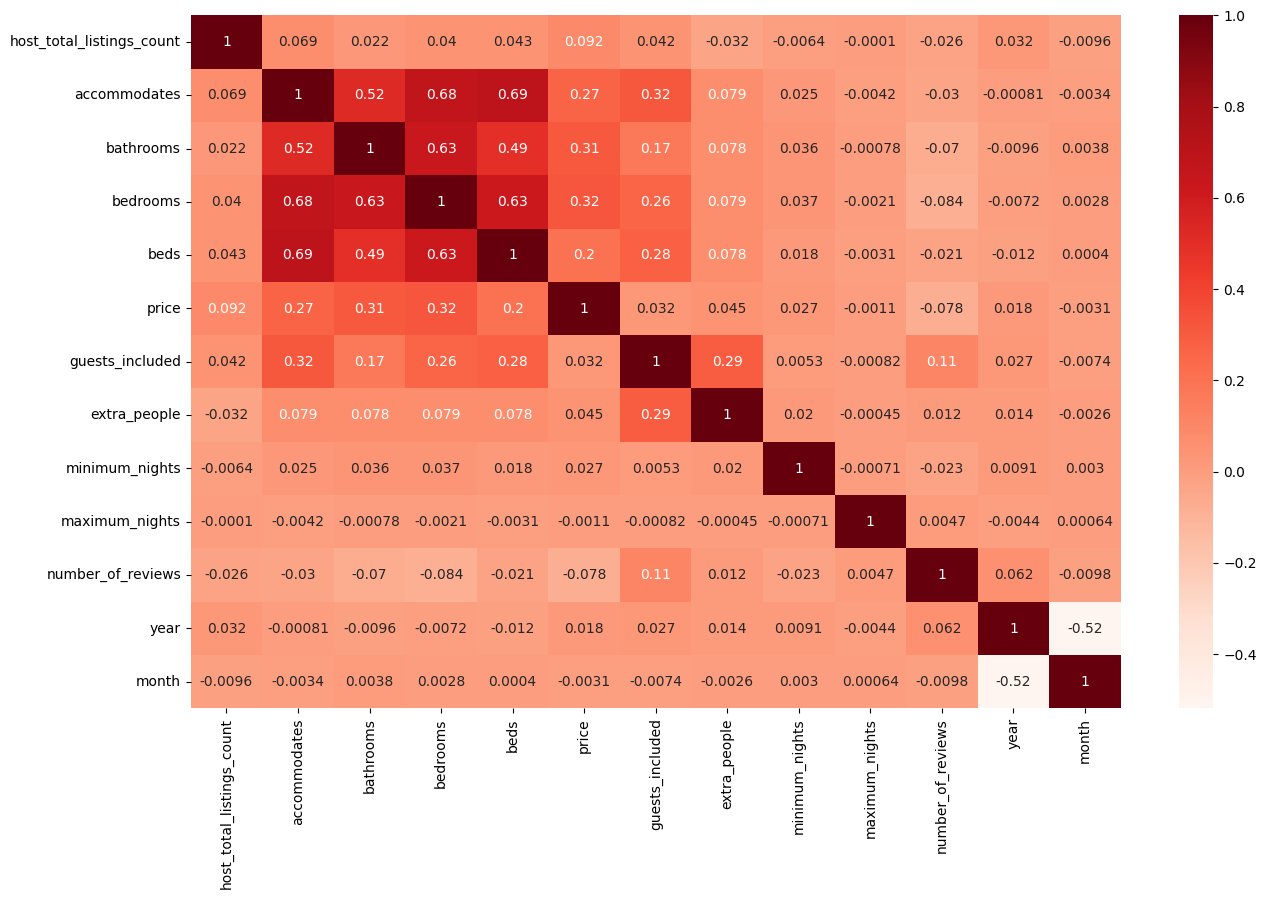

In [43]:
# Checking the correlation between the cols to see if any strong correlation will be removed
plt.figure(figsize=(15,9))
sns.heatmap(airbnb_df.corr(numeric_only=True), annot=True, cmap='Reds')
# As the correlations are't too strong, all cols will be manteined for this analysis.

In [44]:
def lims(col):
    '''Calculates the superior and inferior limit to identify outliers based on the third and first quartile, respectfully, times the amplitude which is the difference between the quartiles.
    If the calculated inferior limit is a negative value, the inferior limit is set to minus 1 for better further graph analysis as it is impossible for the data analyzed to assume a negative value.

    Parameters:
        col (str): pd.DataFrame[column]

    Returns:
        inferior_limit (float): first quartile times amplitude 
        superior_limit (float): third quartile times amplitude
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    amplitude = q3 - q1
    superior_limit = q3 + 1.5 * amplitude
    inferior_limit = q1 - 1.5 * amplitude
    if inferior_limit < 0:
        inferior_limit = -1
    return inferior_limit, superior_limit

def remove_outliers(df, col_name):
    '''Removes the outliers from the DataFrame taking in consideration the limits defined in the lims function

    Parameters:
        df (str): pd.Dataframe
        col_name (str): pd.DataFrame column name as string 

    Returns:
        df (pd.DataFrame): pd.DataFrame without outliers
        rows_removed (int): number of rows removed from the DataFrame
    '''
    row_count = df.shape[0]
    inferior_limit, superior_limit = lims(df[col_name])
    df = df.loc[(df[col_name] >= inferior_limit) & (df[col_name] <= superior_limit), :]
    row_count_new = df.shape[0]
    rows_removed = row_count - row_count_new
    return df, rows_removed

def box_diagram(col):
    '''Creates two box diagrams for data visualization

    Parameters:
        col (str): pd.DataFrame[column]

    Returns:
        figure1: box diagram for outliers visualization
        figure2: box diagram zoomed in without outliers
    '''
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    sns.boxplot(x=col, ax = ax1)
    sns.boxplot(x=col, ax = ax2)
    ax2.set_xlim(lims(col))

def histogram(col):
    '''Creates a histogram for data visualization

    Parameters:
        col (str): pd.DataFrame[column]

    Returns:
        figure: histogram for data distribution evaluation
    '''
    plt.figure(figsize=(15,5))
    sns.histplot(airbnb_df, x=col, stat='density')

def bar_graph(col):
    '''Creates a bar graph for data visualization

    Parameters:
        col (str): pd.DataFrame[column]

    Returns:
        figure: bar graph for data distribution evaluation inside the limits without outliers
    '''
    plt.figure(figsize=(15,5))
    bars = plt.bar(col.value_counts().index, col.value_counts())
    plt.bar_label(bars, labels=col.value_counts(), padding=3, fontsize=10, fontweight='bold')
    plt.xticks(col.value_counts().index)
    plt.xlim(lims(col))

def text_bar_graph(col_name):
    '''Creates a bar graph for data visualization in text columns

    Parameters:
        col_name (str): pd.DataFrame column name as string

    Returns:
        figure: bar graph for data distribution evaluation inside the limits without outliers
    '''
    plt.figure(figsize=(15,5))
    sns.countplot(data = airbnb_df, x = col_name).tick_params(rotation = 90)


### price analysis
    -> Outliers were removed in this case due to the model objective to predict the value of accomodations for a generic person, not taking in account high end apartments/houses

(-1, 1276.0)
87282


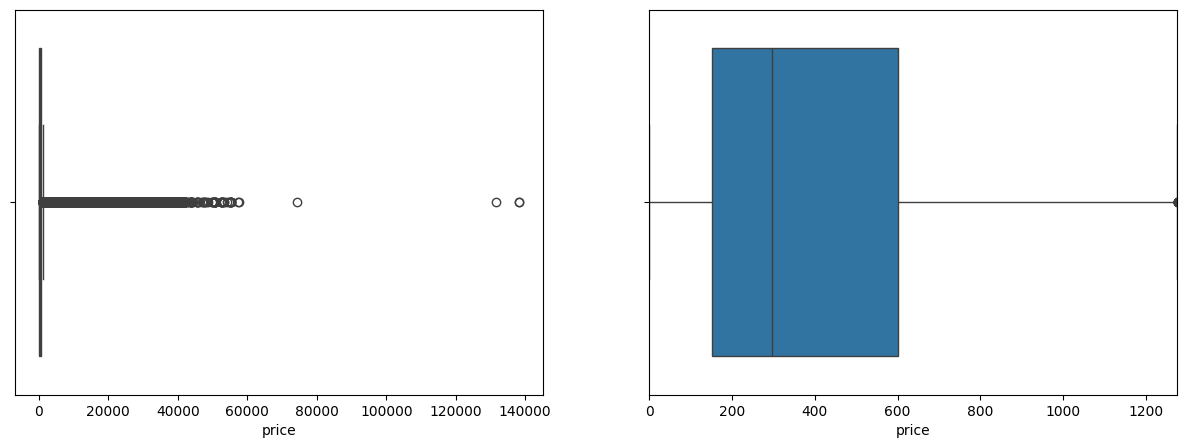

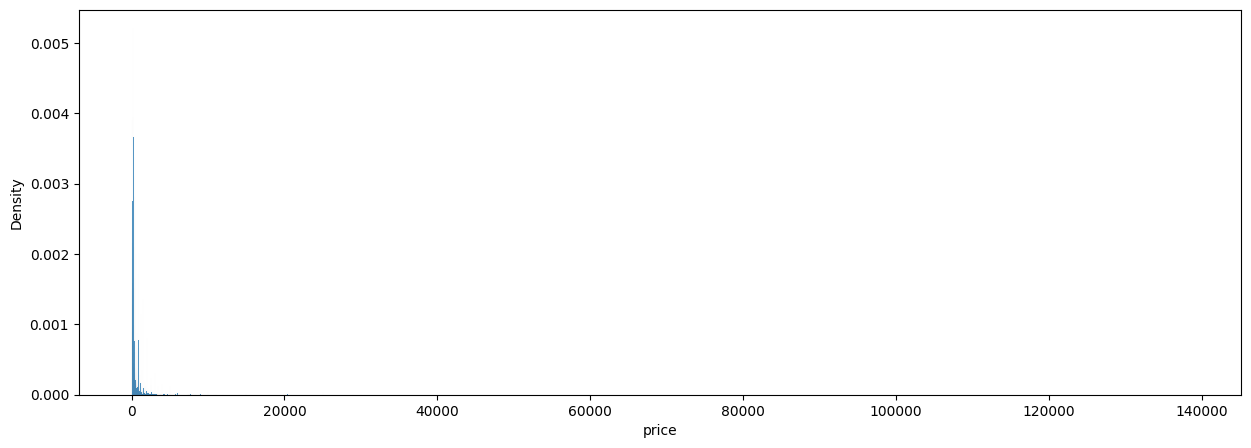

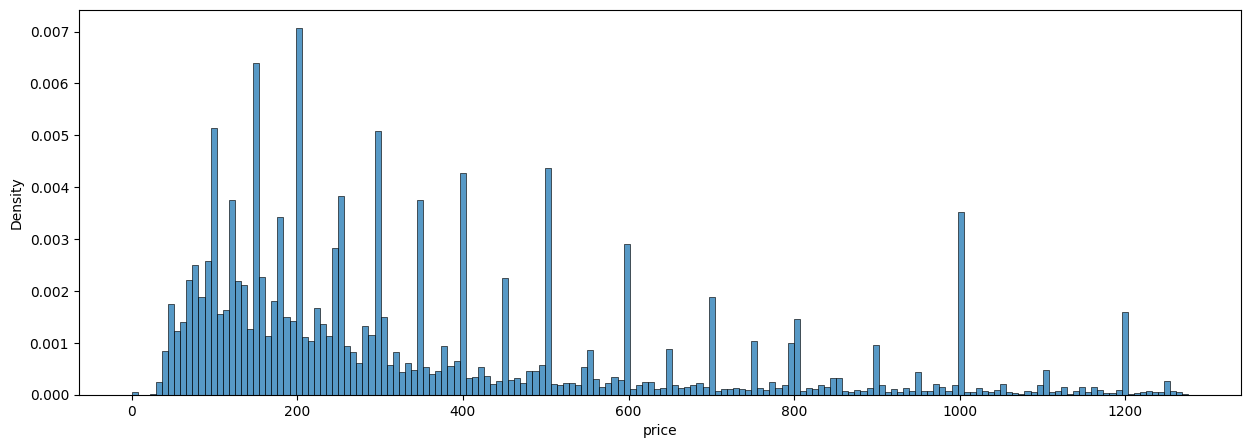

In [45]:
print(lims(airbnb_df['price']))
box_diagram(airbnb_df['price'])
histogram(airbnb_df['price'])
airbnb_df, rows_removed = remove_outliers(airbnb_df, 'price')
print(rows_removed)
histogram(airbnb_df['price'])

## extra_people analysis
    -> In this case, outliers are being removed at first due to the fact that it doesn't remove a large number of data given the size of our sample.
    As the price of extra_people is relatively low, this column may be totaly removed from analysis in the future. On the other hand, if outliers prices of extra people impact on the type of housing analyzed, it can be included again in the model afterwards.

(-1, 125.0)
59194


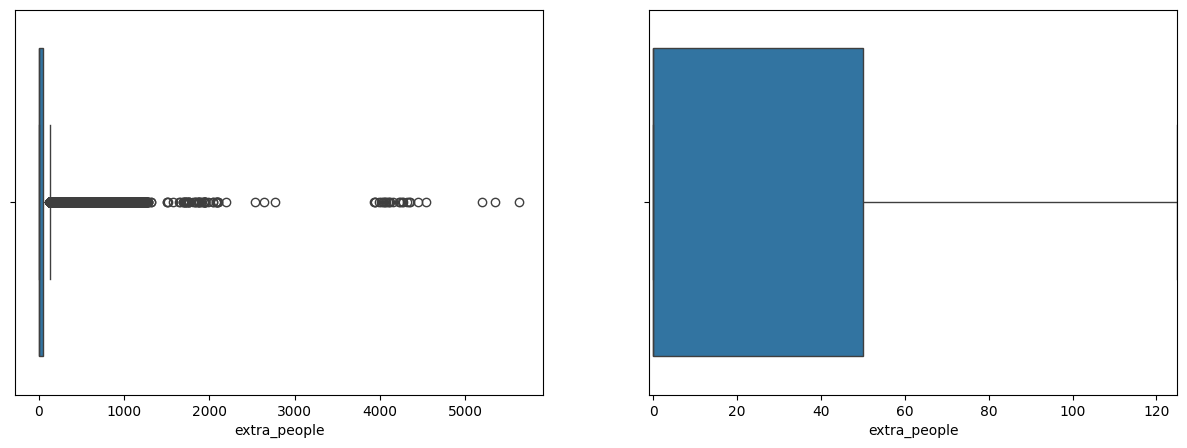

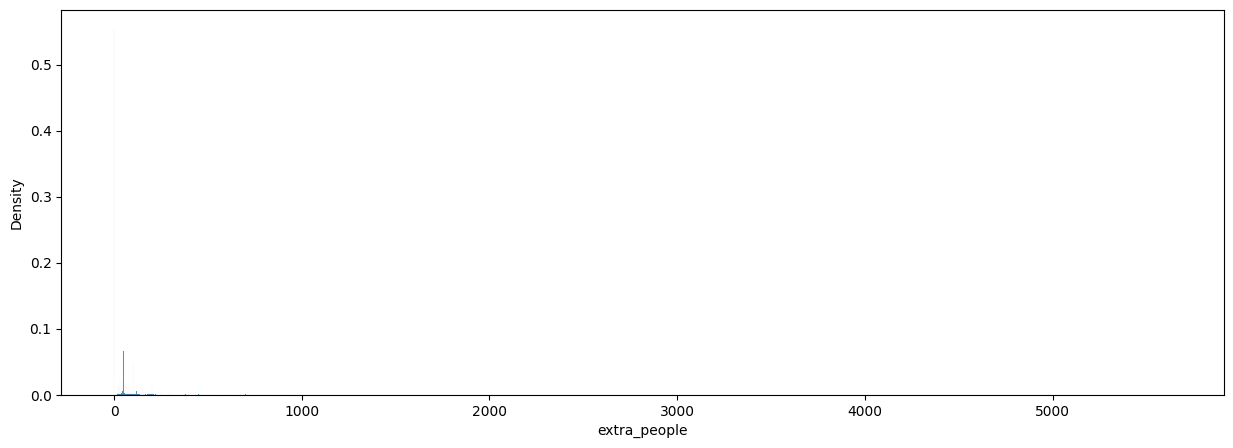

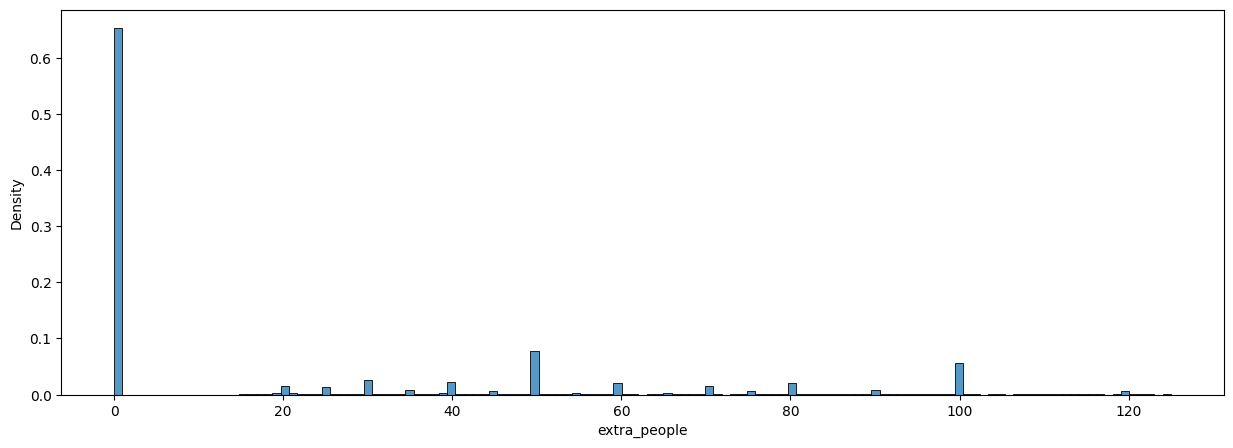

In [46]:
print(lims(airbnb_df['extra_people']))
box_diagram(airbnb_df['extra_people'])
histogram(airbnb_df['extra_people'])
airbnb_df, rows_removed = remove_outliers(airbnb_df, 'extra_people')
print(rows_removed)
histogram(airbnb_df['extra_people'])

### host_total_listings_count analysis
    -> Outliers were not removed from this model due to fact that hosts with a higher number of listings are probably companies that work with housing rental, which is a feature to be taken in considearation due to the different type of negotiation.

(-1, 6.0)


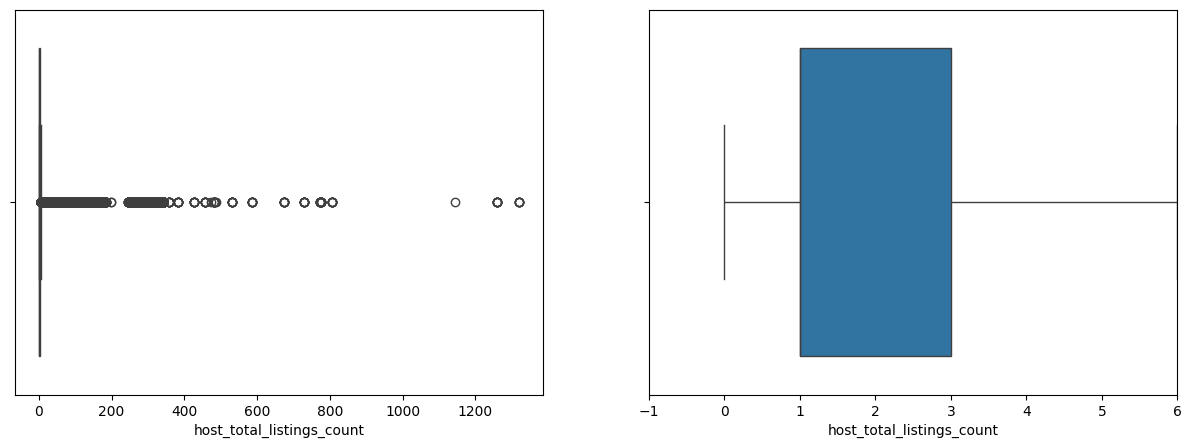

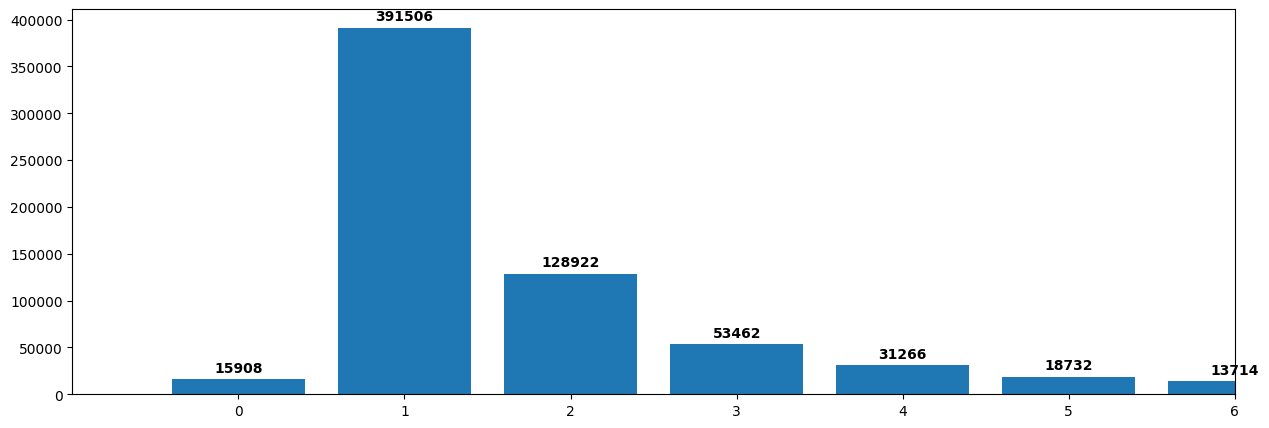

In [47]:
print(lims(airbnb_df['host_total_listings_count']))
box_diagram(airbnb_df['host_total_listings_count'])
bar_graph(airbnb_df['host_total_listings_count'])

### accommodates analysis
    -> The number of people the listing accommodates was not removed from analysis due to the fact that the model aims to predict the prices for any given size of property and the low number of outliers in this case. Furthermore, given the exclusion of high price listings before, these listings with a high number of people they can accommodate are probably not high end apartment/houses, which can still fit them in the generic people listings.

(-1, 9.5)


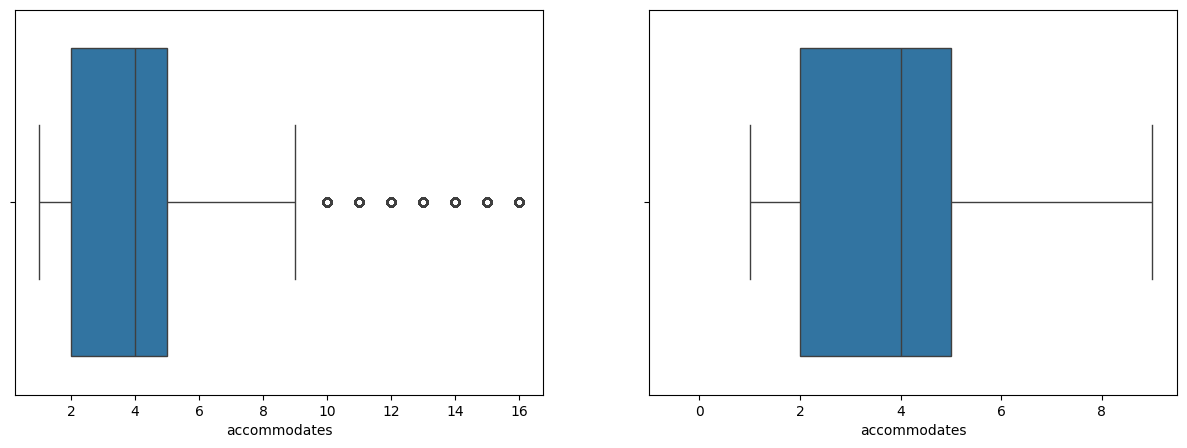

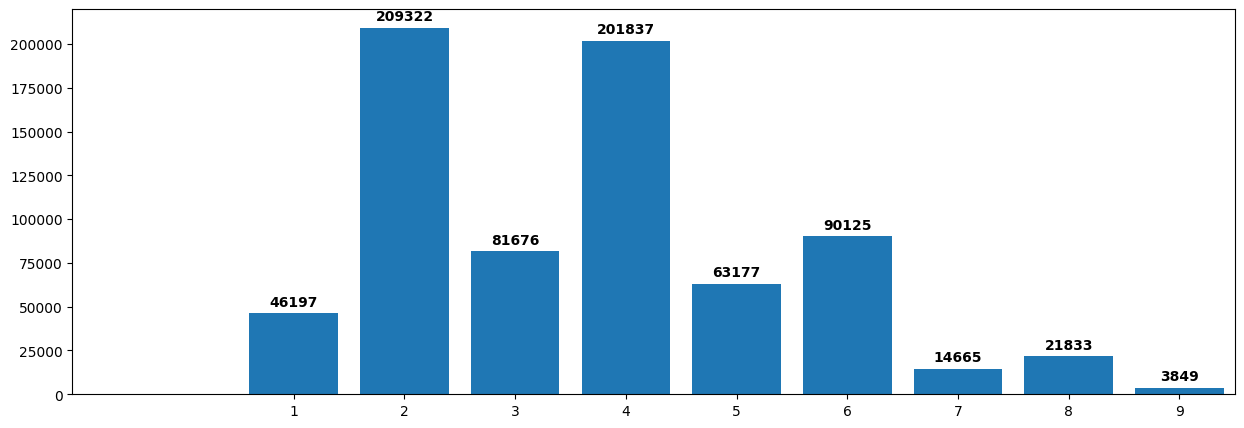

In [48]:
print(lims(airbnb_df['accommodates']))
box_diagram(airbnb_df['accommodates'])
bar_graph(airbnb_df['accommodates'])

### bathrooms analysis
    -> The number of bathrooms in the listing was not removed from analysis due to the fact that the model aims to predict the prices for any given size of property and the low number of outliers in this case.

(-1, 3.5)


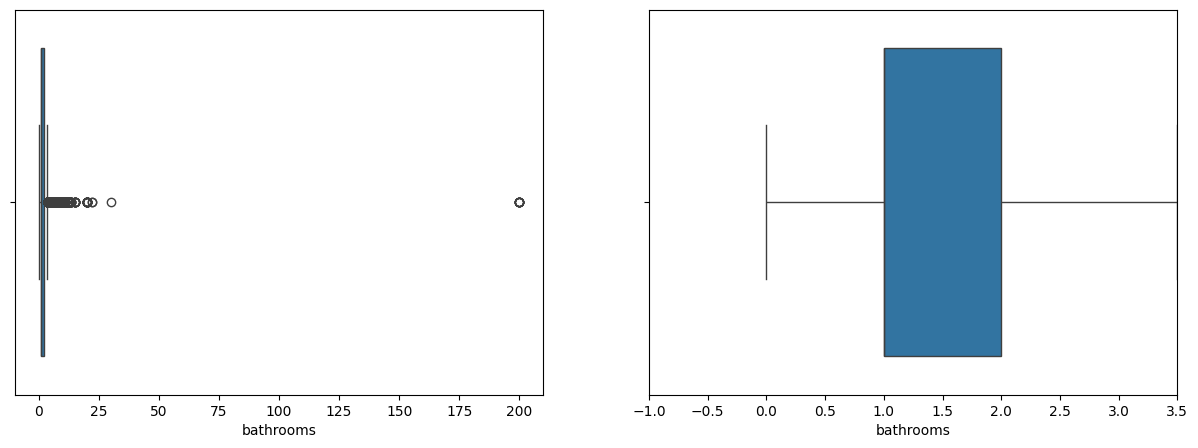

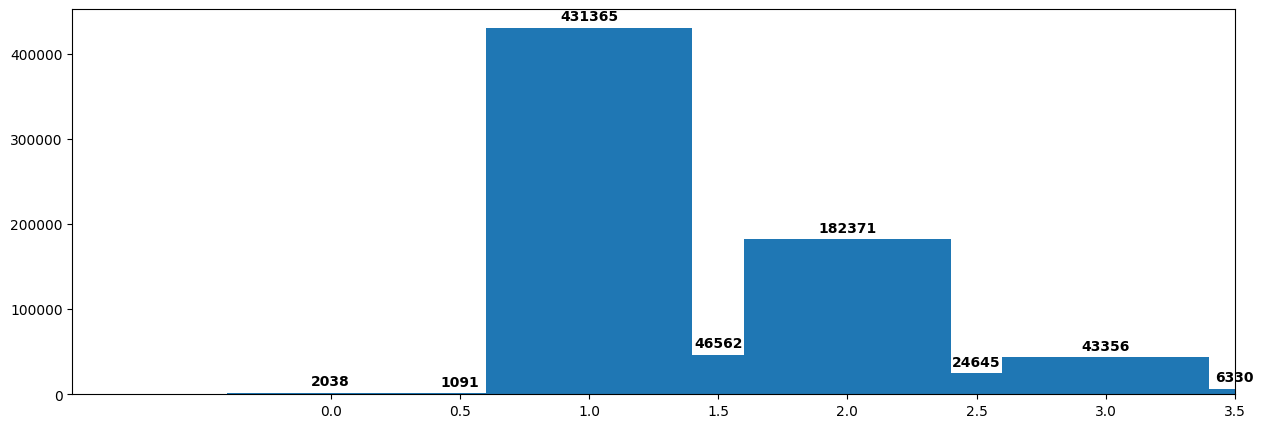

In [49]:
print(lims(airbnb_df['bathrooms']))
box_diagram(airbnb_df['bathrooms'])
bar_graph(airbnb_df['bathrooms'])

### bedrooms analysis
    -> The number of bedrooms in the listing was not removed from analysis due to the fact that the model aims to predict the prices for any given size of property and the low number of outliers in this case.

(-1, 3.5)


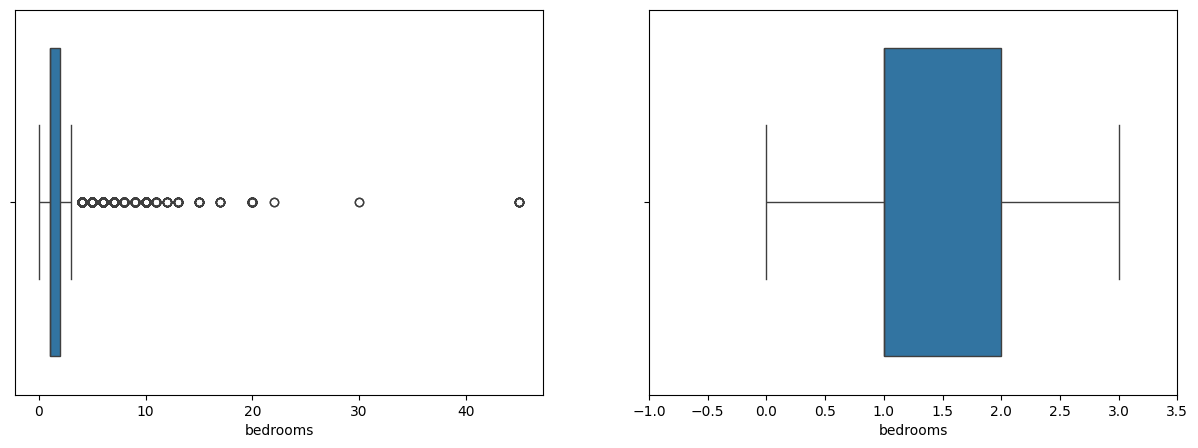

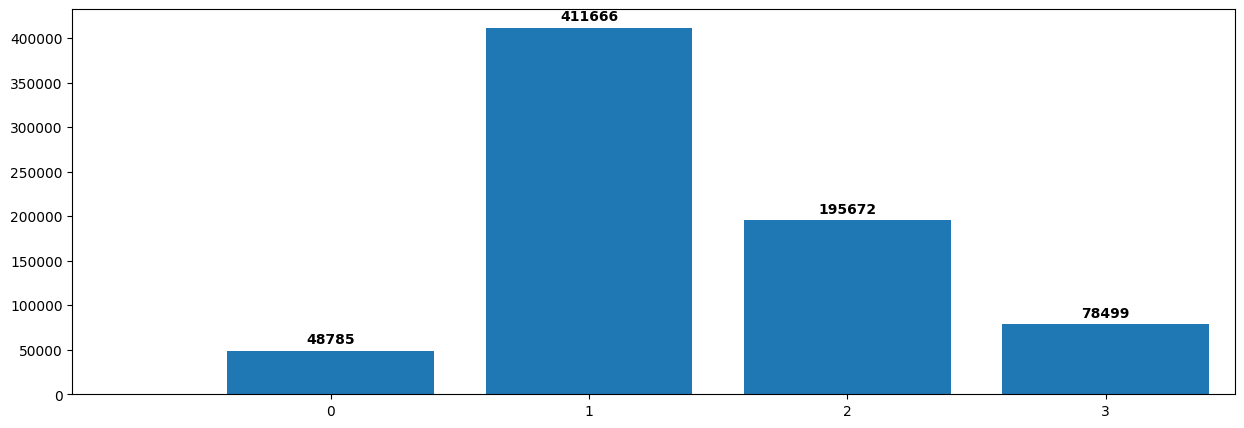

In [50]:
print(lims(airbnb_df['bedrooms']))
box_diagram(airbnb_df['bedrooms'])
bar_graph(airbnb_df['bedrooms'])

### beds analysis
    -> The number of beds in the listing was not removed from analysis due to the fact that the model aims to predict the prices for any given size of property and the low number of outliers in this case.

(-1, 6.0)


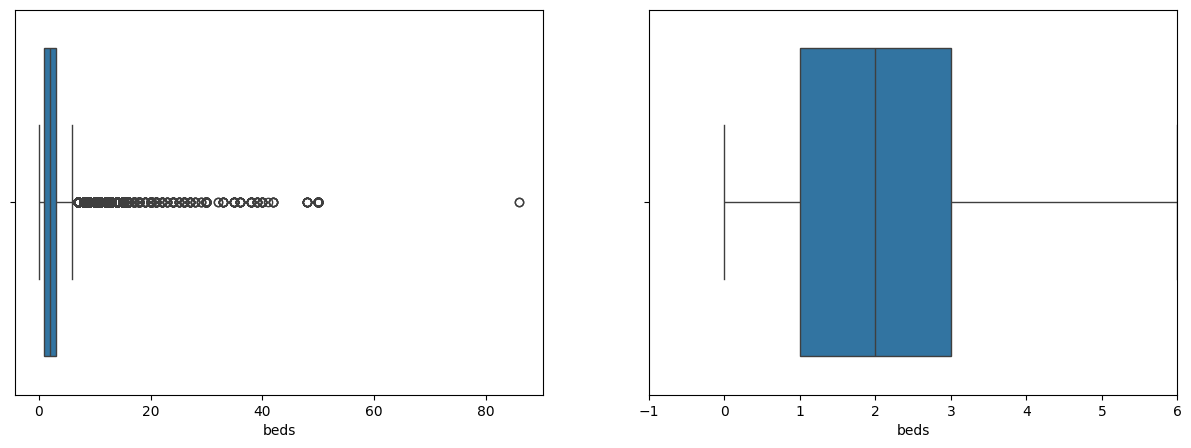

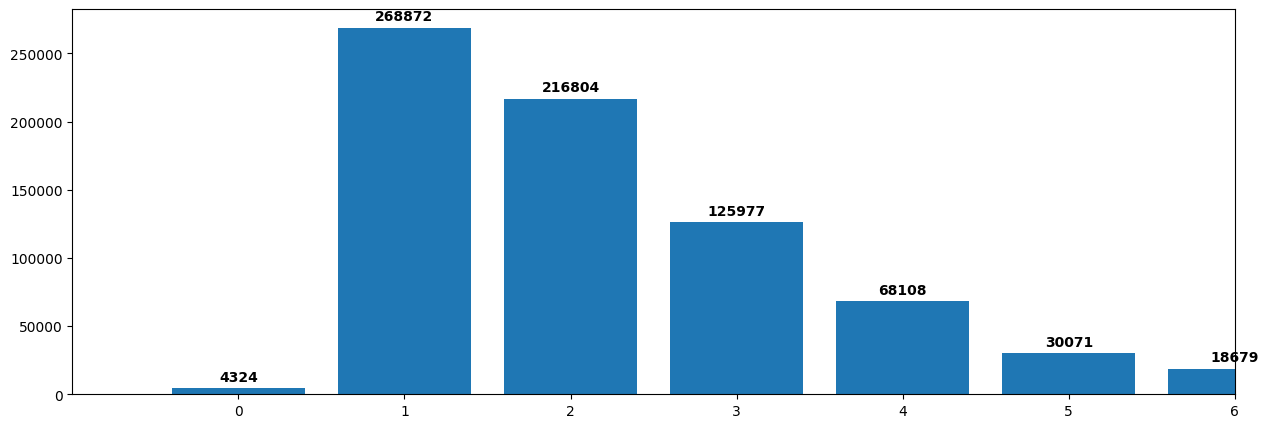

In [51]:
print(lims(airbnb_df['beds']))
box_diagram(airbnb_df['beds'])
bar_graph(airbnb_df['beds'])

### guests_included analysis
    -> As the guests_included has a high concentration in 1 guest included, it seems like it's a problem with the data presented. This feature may have been filled in wrongfully during the creating of the listings on the website, which can impact on the model in a bad way. For that reason, this column is removed from analysis.

(-1, 3.5)


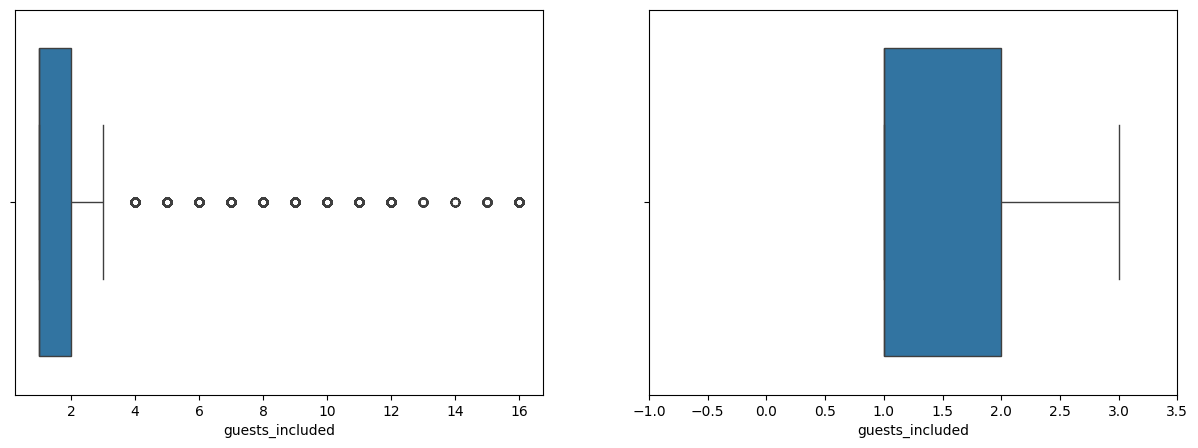

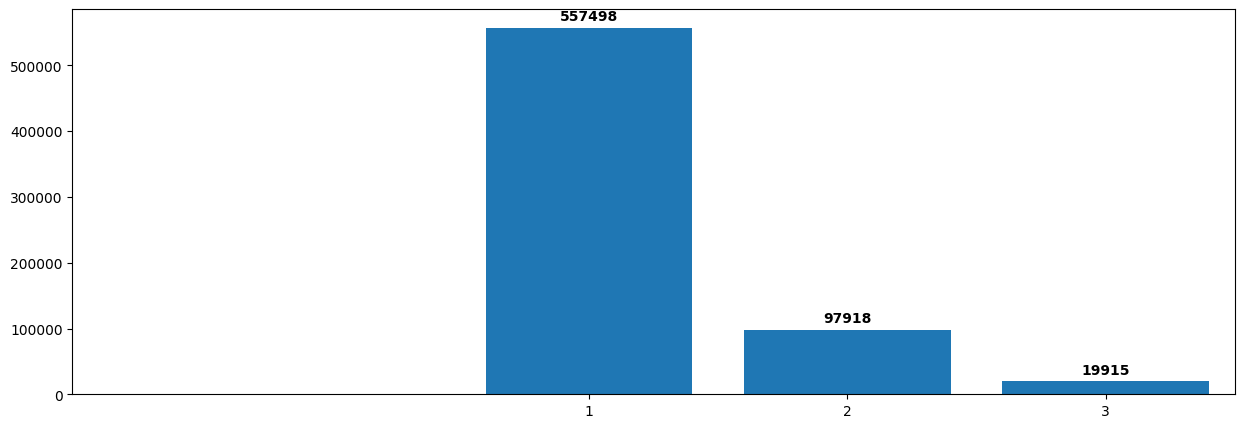

In [52]:
print(lims(airbnb_df['guests_included']))
box_diagram(airbnb_df['guests_included'])
bar_graph(airbnb_df['guests_included'])
airbnb_df = airbnb_df.drop('guests_included', axis = 1)

### minimum and maximum nights evaluation
    -> minimum nights were kept for the analysis due to the belief that this feature is probably more used during high season, when the accomodations tend to be more sought after due to factors such as holidays, and because the model aims to predict the price during specific times of the year. Given the fact that most of the data is within the limit estabilished, the outliers were removed for better precision of the model.
    -> On the other hand, maximum nights data is way too randomized for analysis so it was removed from the model.

(-1, 8.5)
45927
----------------------------------------
(-1, 2767.5)


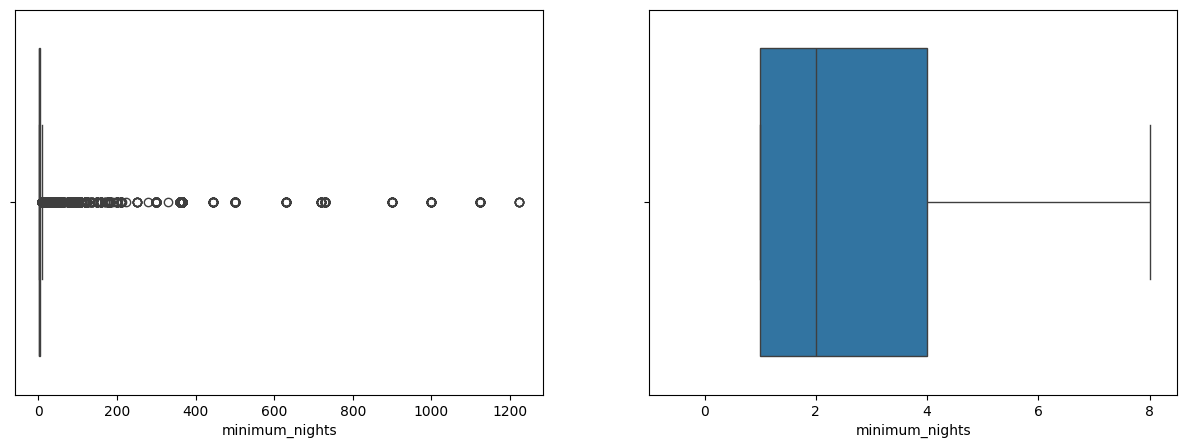

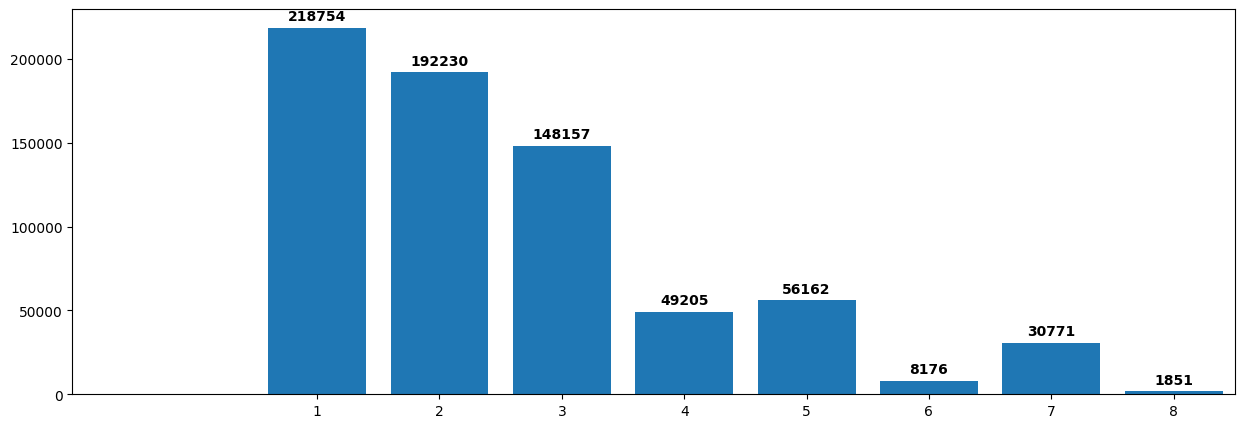

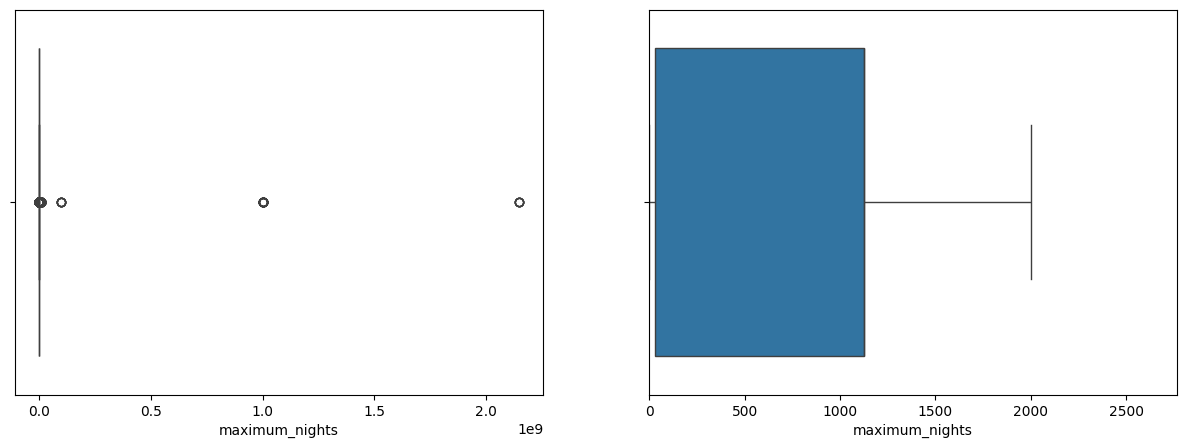

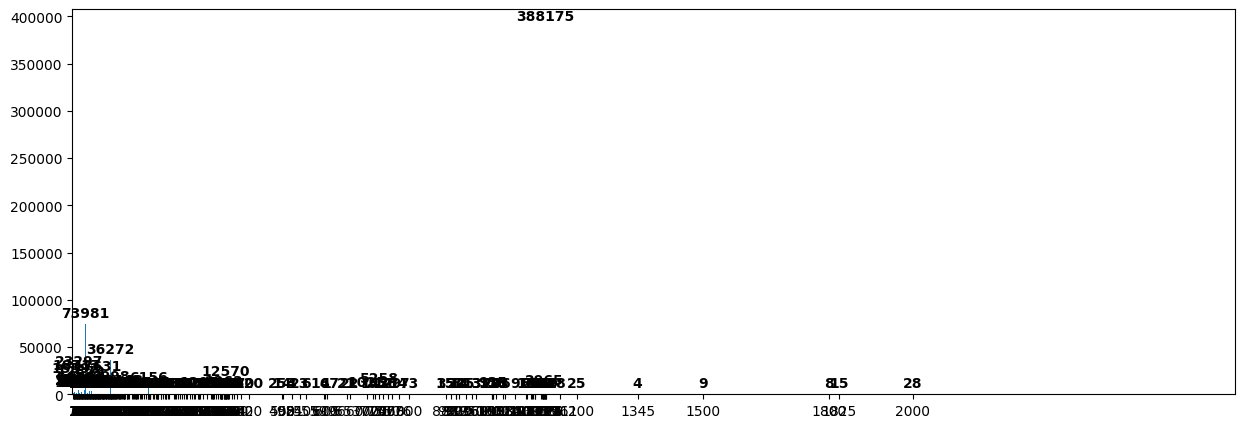

In [53]:
print(lims(airbnb_df['minimum_nights']))
box_diagram(airbnb_df['minimum_nights'])
bar_graph(airbnb_df['minimum_nights'])
airbnb_df, rows_removed = remove_outliers(airbnb_df, 'minimum_nights')
print(rows_removed)
print ('-' * 40)
print(lims(airbnb_df['maximum_nights']))
box_diagram(airbnb_df['maximum_nights'])
bar_graph(airbnb_df['maximum_nights'])
airbnb_df = airbnb_df.drop('maximum_nights', axis=1)

### number_of_reviews analysis
    -> The number of reviews outliers was not removed from the analysis given that it aims to identify the generic prices of accomodations given the time of the year in order for a generic person to book it. Accomodations with a high number of reviews may have been in the website for a longer time, giving the user the ability to identify if the listings are accordingly to the reality.

(-1, 15.0)


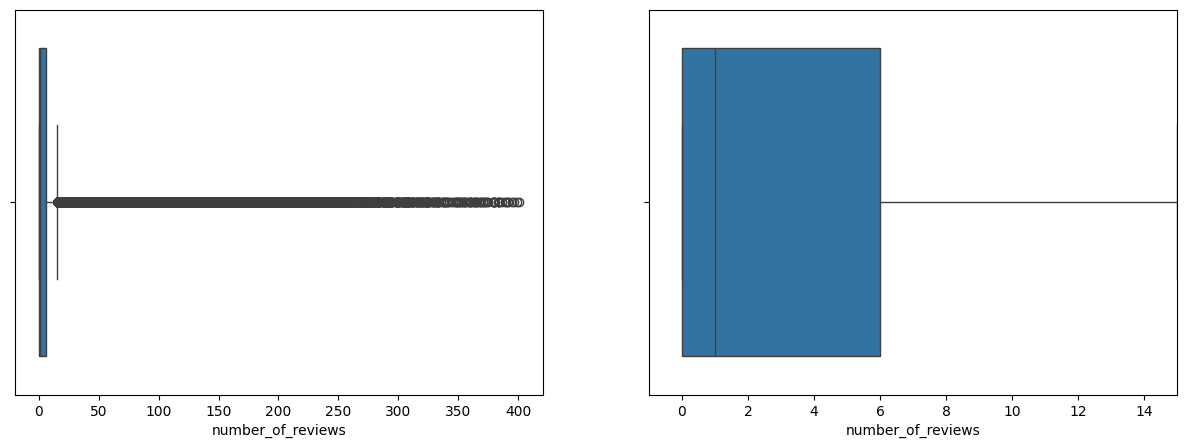

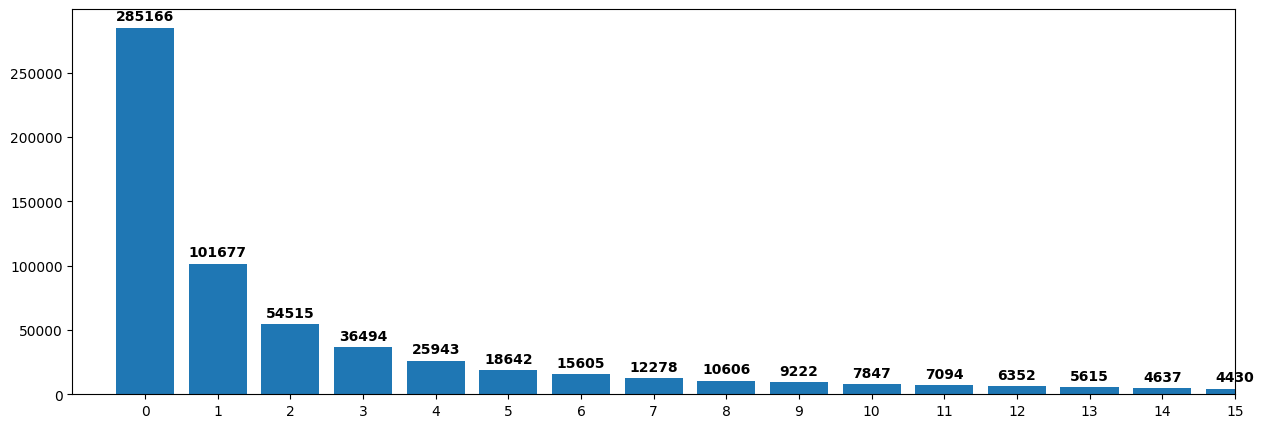

In [54]:
print(lims(airbnb_df['number_of_reviews']))
box_diagram(airbnb_df['number_of_reviews'])
bar_graph(airbnb_df['number_of_reviews'])

### property_type analysis
    -> As data was way to sparse in this column, all values after 'Other' were grouped in the 'Other' category to reduce the quantity of categories

property_type
Apartment                 546847
House                      65611
Condominium                32394
Serviced apartment         17345
Loft                       13439
Bed and breakfast           5822
Guest suite                 4272
Hostel                      4258
Guesthouse                  2721
Other                       2672
Villa                       1518
Aparthotel                  1312
Townhouse                   1211
Hotel                       1190
Boutique hotel               600
Earth house                  590
Chalet                       554
Cottage                      509
Tiny house                   498
Casa particular (Cuba)       349
Bungalow                     260
Cabin                        211
Dorm                         208
Nature lodge                 187
Castle                       150
Treehouse                     76
Island                        64
Boat                          58
Tent                          46
Farm stay                    

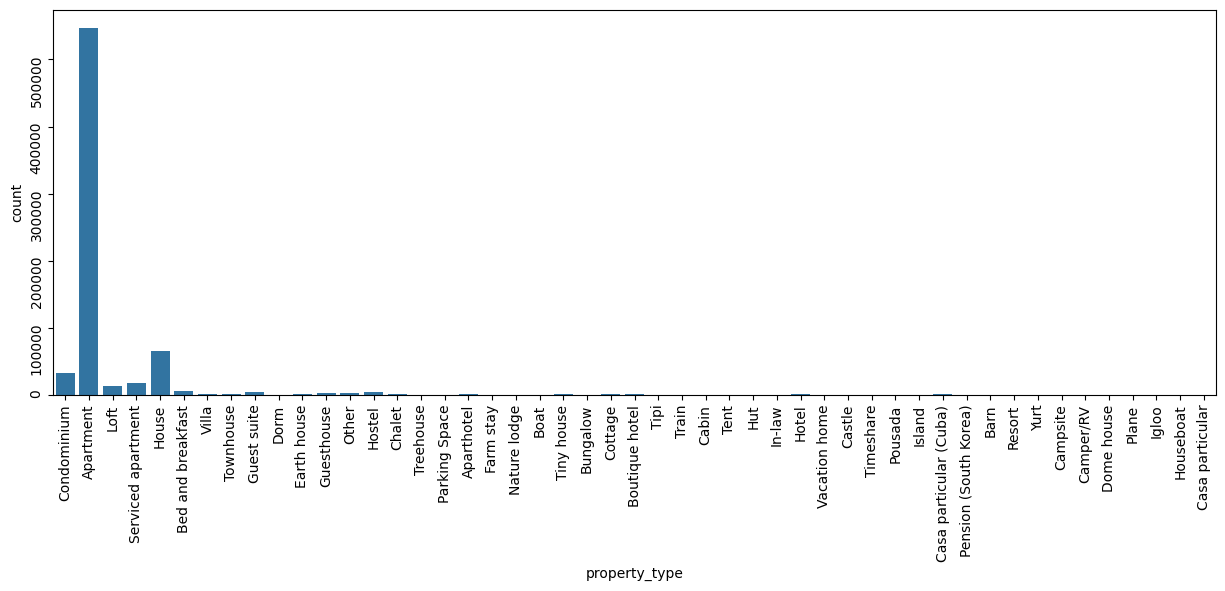

In [55]:
print(airbnb_df['property_type'].value_counts())

text_bar_graph('property_type')

property_type
Apartment             546847
House                  65611
Condominium            32394
Serviced apartment     17345
Loft                   13439
Other                  12597
Bed and breakfast       5822
Guest suite             4272
Hostel                  4258
Guesthouse              2721
Name: count, dtype: int64


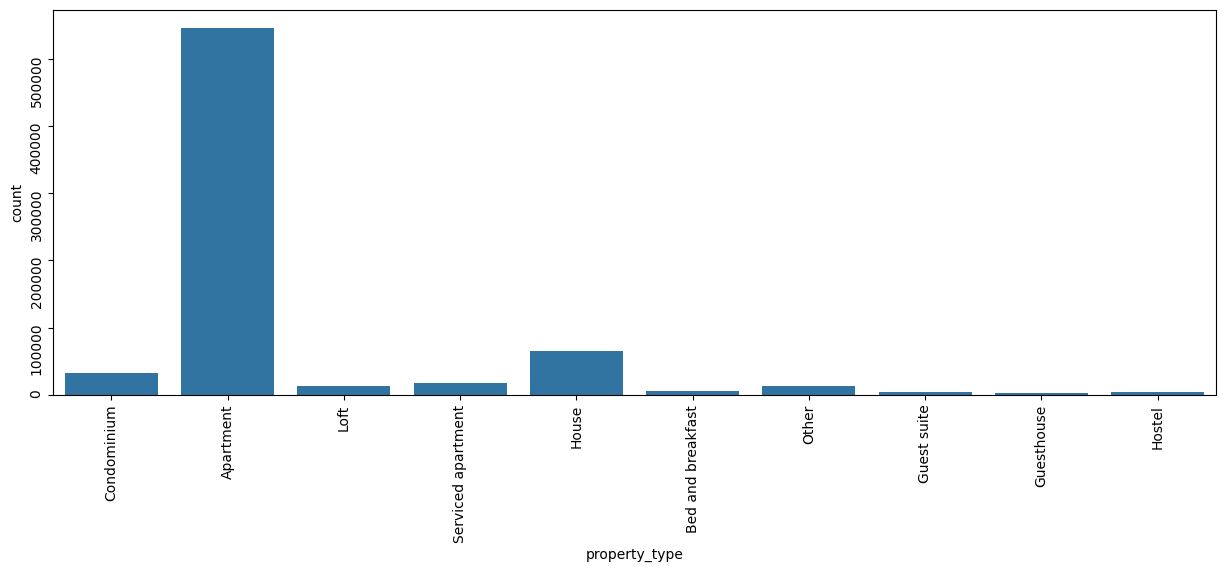

In [56]:
property_types = airbnb_df['property_type'].value_counts()
min_value = int((airbnb_df['property_type'] == 'Other').sum())
grouped_columns = []

for property_type in property_types.index:
    if property_types[property_type] < min_value:
        grouped_columns.append(property_type)
for type_removed in grouped_columns:
    airbnb_df.loc[airbnb_df['property_type'] == type_removed, 'property_type'] = 'Other'

print(airbnb_df['property_type'].value_counts())

text_bar_graph('property_type')

### room_type analysis
    -> As there are only a few categories for room types, no processing was done for this column.
    

room_type
Entire home/apt    472448
Private room       213476
Shared room         17348
Hotel room           2034
Name: count, dtype: int64


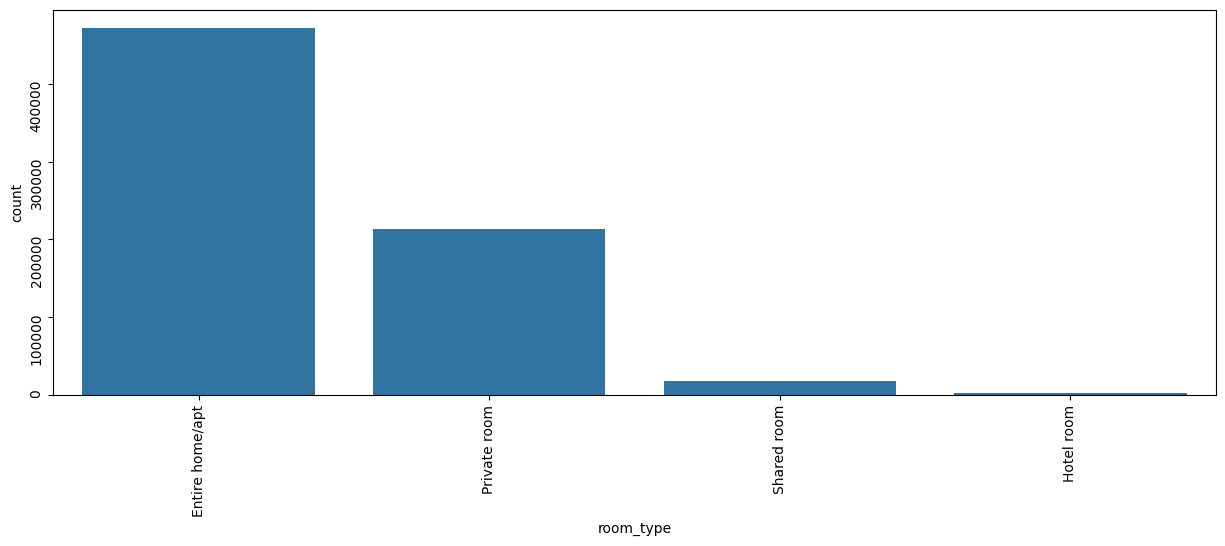

In [57]:
print(airbnb_df['room_type'].value_counts())
text_bar_graph('room_type')

### bed_type analysis
    -> As there are only a few categories for bed types, no processing was done for this column. Even though types other than 'Real Bed' are very low, for this model it's believed that this in an important feature while choosing which accomodation to book, so it was left unaltered.

bed_type
Real Bed         693294
Pull-out Sofa      8288
Futon              1862
Airbed             1294
Couch               568
Name: count, dtype: int64


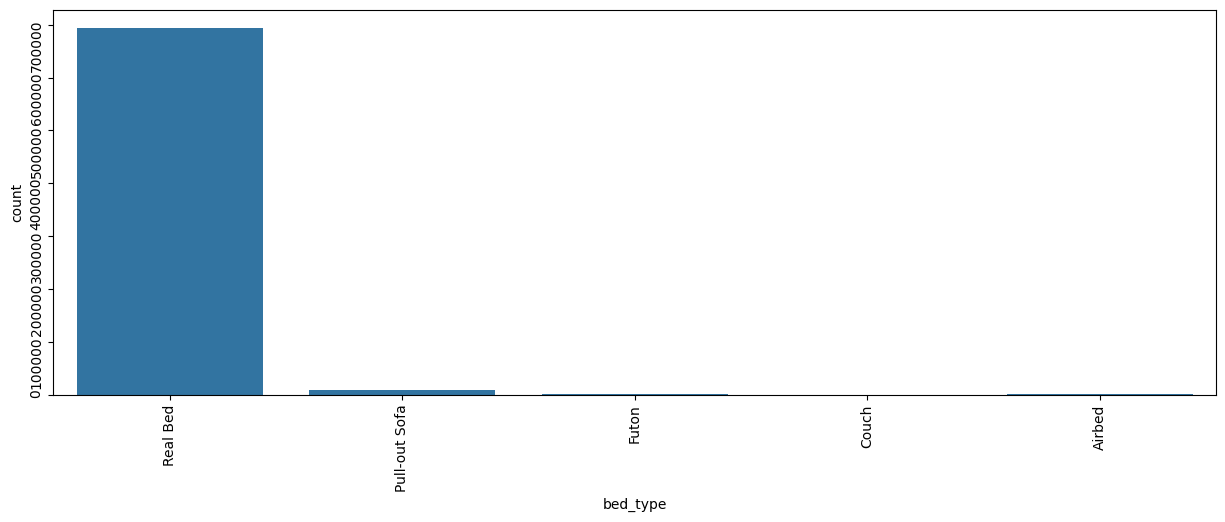

In [58]:
print(airbnb_df['bed_type'].value_counts())
text_bar_graph('bed_type')

### cancelation_policy analysis
    -> For this column, the different categories were grouped in three different categories to simplify the analysis: 'flexible', 'moderate', 'strict'. This was done due to the fact that there were more than one type of strict categories making the data spread in an unnecessary way. 

cancellation_policy
flexible                       292359
strict_14_with_grace_period    264522
moderate                       126266
strict                          13036
super_strict_60                  6514
super_strict_30                  2609
Name: count, dtype: int64
cancellation_policy
flexible    292359
strict      286681
moderate    126266
Name: count, dtype: int64


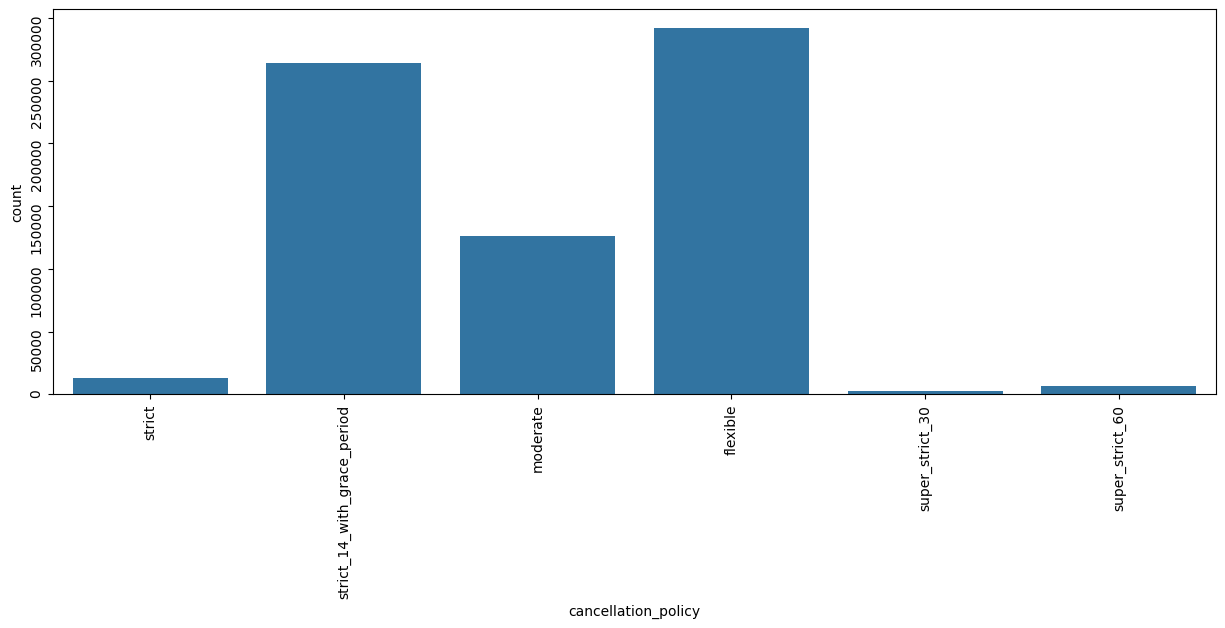

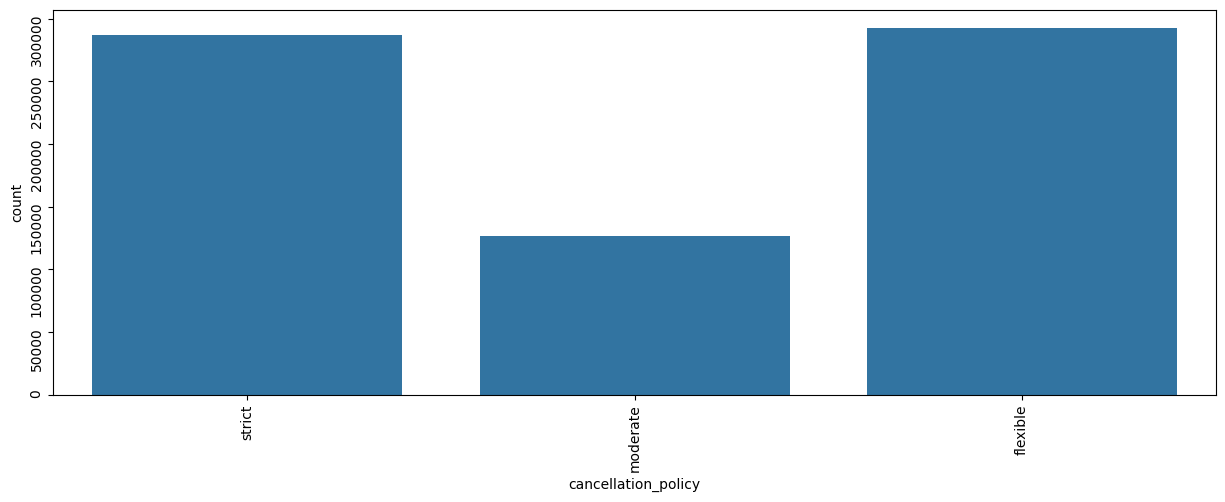

In [59]:
print(airbnb_df['cancellation_policy'].value_counts())
text_bar_graph('cancellation_policy')

cancellation_policys = airbnb_df['cancellation_policy'].value_counts()
cancellation_policys_kept = ['flexible', 'moderate', 'strict']
grouped_categories = []

for cancellation_policy in cancellation_policys.index:
    if cancellation_policy not in cancellation_policys_kept:
        grouped_categories.append(cancellation_policy)
for type_removed in grouped_categories:
    if 'flexible' in type_removed:
        airbnb_df.loc[airbnb_df['cancellation_policy'] == type_removed, 'cancellation_policy'] = 'flexible'
    if 'moderate' in type_removed:
        airbnb_df.loc[airbnb_df['cancellation_policy'] == type_removed, 'cancellation_policy'] = 'moderate'
    if 'strict' in type_removed:
        airbnb_df.loc[airbnb_df['cancellation_policy'] == type_removed, 'cancellation_policy'] = 'strict'

print(airbnb_df['cancellation_policy'].value_counts())

text_bar_graph('cancellation_policy')

### amenities analysis
    -> As no key word analysis will be done for this model, the solution encountered was to evaluate the size of the list which describes the amenities. It is believed that hosts who spend time filling out this information more extensively, trying to englobe each and every differential the listing may have would also price it above market. Furthermore many of the amenities listed can be mean the same thing but be writen in n different ways. Therefore this alternative allows to analyze this important feature for this model without making it a complicated keyword analysis.

    -> As amenities was transformed into a numeric column it was treated to remove outliers

In [60]:
print(airbnb_df['amenities'].value_counts())

airbnb_df['n_amenities'] = airbnb_df['amenities'].str.split(',').apply(len).astype(np.int32)
airbnb_df = airbnb_df.drop('amenities', axis=1)

amenities
{}                                                                                                                                                                                                                                                                                                                                                                           6838
{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,Doorman,Elevator,"Buzzer/wireless intercom",Washer}                                                                                                                                                                                                                                                                   333
{"Family/kid friendly"}                                                                                                                                                                                                                                   

(-1, 41.0)
21284


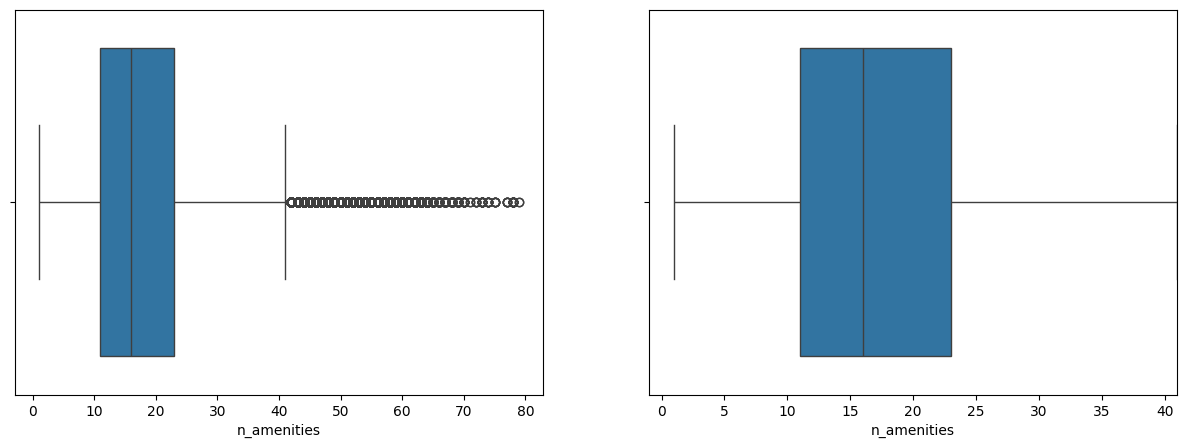

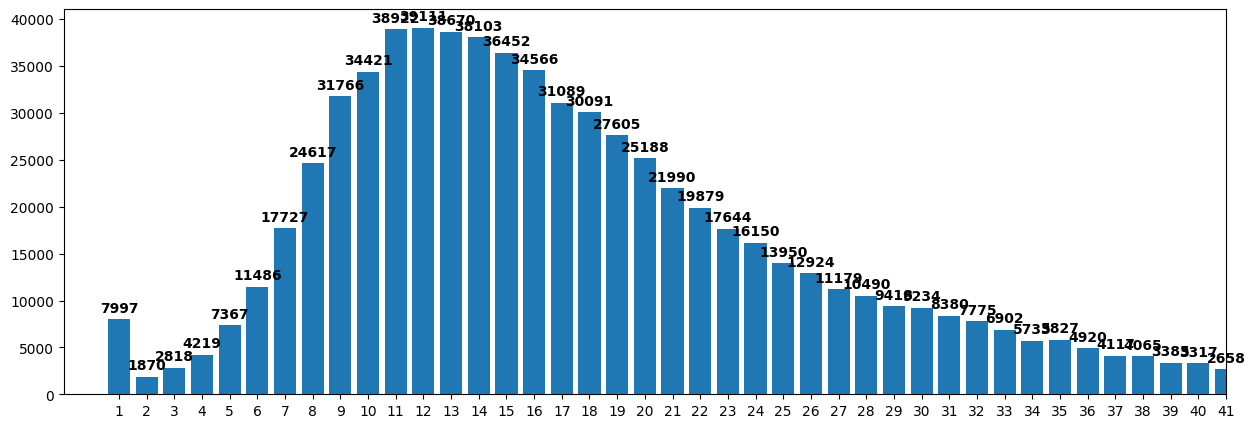

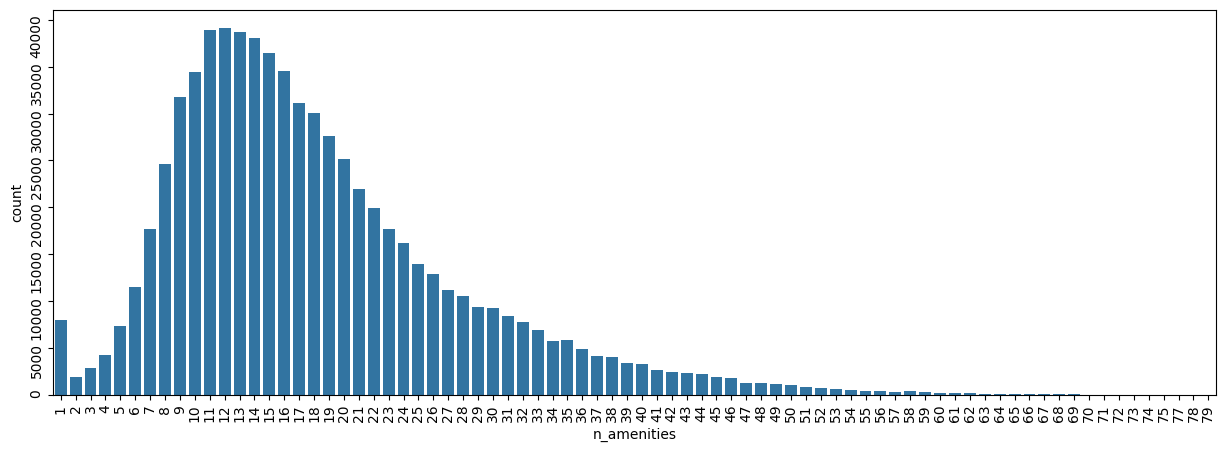

In [61]:
print(lims(airbnb_df['n_amenities']))
box_diagram(airbnb_df['n_amenities'])
bar_graph(airbnb_df['n_amenities'])
plt.figure(figsize=(15,5))
sns.countplot(data = airbnb_df, x = 'n_amenities').tick_params(rotation = 90)
airbnb_df, rows_removed = remove_outliers(df=airbnb_df,col_name='n_amenities')
print(rows_removed)

### neighbourhood_cleansed analysis
    -> Data for this column is very sparse but as it gives the locations to be analyzed no processing will be done for it 

neighbourhood_cleansed
Copacabana         186053
Barra da Tijuca     63959
Ipanema             56358
Botafogo            35927
Jacarepaguá         32822
                    ...  
Engenheiro Leal         6
Costa Barros            6
Zumbi                   2
Turiaçú                 2
Jacarezinho             2
Name: count, Length: 159, dtype: int64


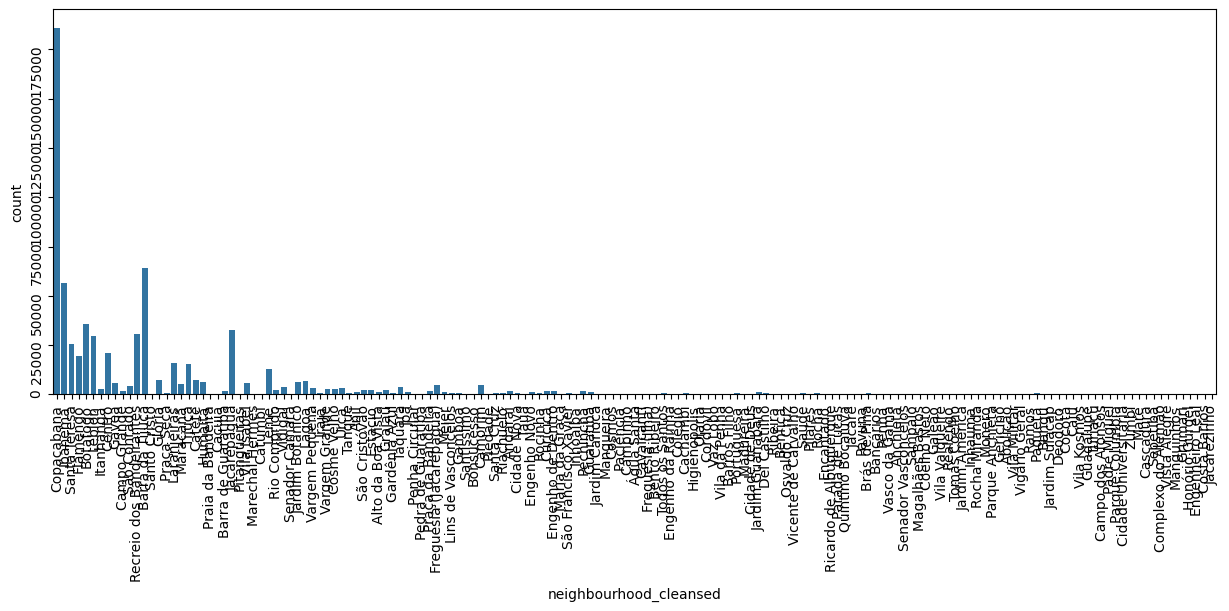

In [62]:
print(airbnb_df['neighbourhood_cleansed'].value_counts())
text_bar_graph('neighbourhood_cleansed')

### Encoding
    
    -> Adjusting columns for better eficiency in machine learning model where:
    -> True will be 1 and False 0
    -> Category features will use dummy variables

In [63]:
tf_columns = ['host_is_superhost', 'host_identity_verified', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification']
category_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'neighbourhood_cleansed']

In [64]:
airbnb_df_encoded = airbnb_df.copy()
for col in tf_columns:
    airbnb_df_encoded.loc[airbnb_df_encoded[col]=='t', col] = 1
    airbnb_df_encoded.loc[airbnb_df_encoded[col]=='f', col] = 0

airbnb_df_encoded = pd.get_dummies(data = airbnb_df_encoded, columns=category_columns, dtype=(np.int32))
display(airbnb_df_encoded.head())

,host_is_superhost,host_total_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,...,neighbourhood_cleansed_Vidigal,neighbourhood_cleansed_Vigário Geral,neighbourhood_cleansed_Vila Isabel,neighbourhood_cleansed_Vila Kosmos,neighbourhood_cleansed_Vila Militar,neighbourhood_cleansed_Vila Valqueire,neighbourhood_cleansed_Vila da Penha,neighbourhood_cleansed_Vista Alegre,neighbourhood_cleansed_Zumbi,neighbourhood_cleansed_Água Santa
1,1,2,0,5,1.0,2,2,270.0,51.0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,3,1,3,1.0,1,2,161.0,45.0,4,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,3,1.0,1,2,222.0,68.0,2,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,3,1.5,1,2,308.0,86.0,2,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,2,1.0,1,2,219.0,80.0,3,...,0,0,0,0,0,0,0,0,0,0


### Analyzing the remaining true or false columns

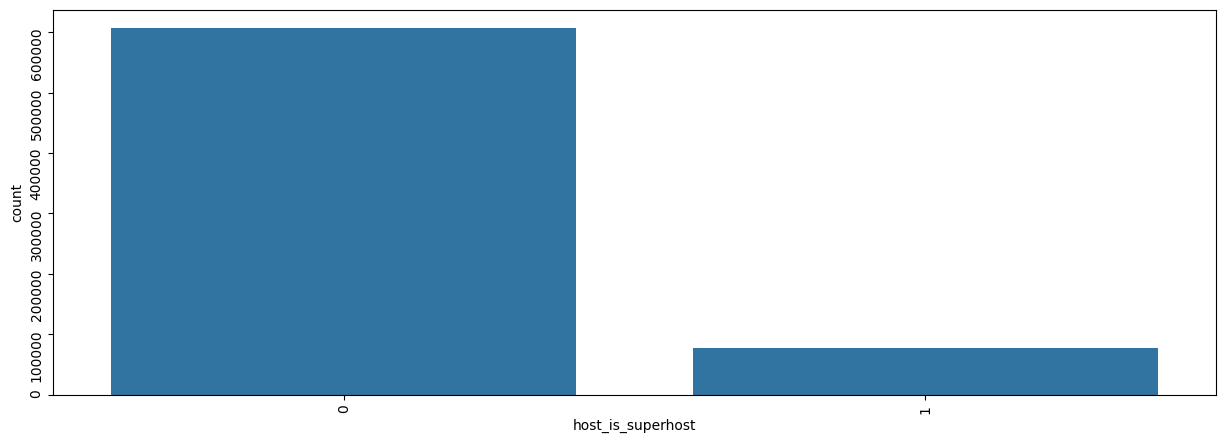

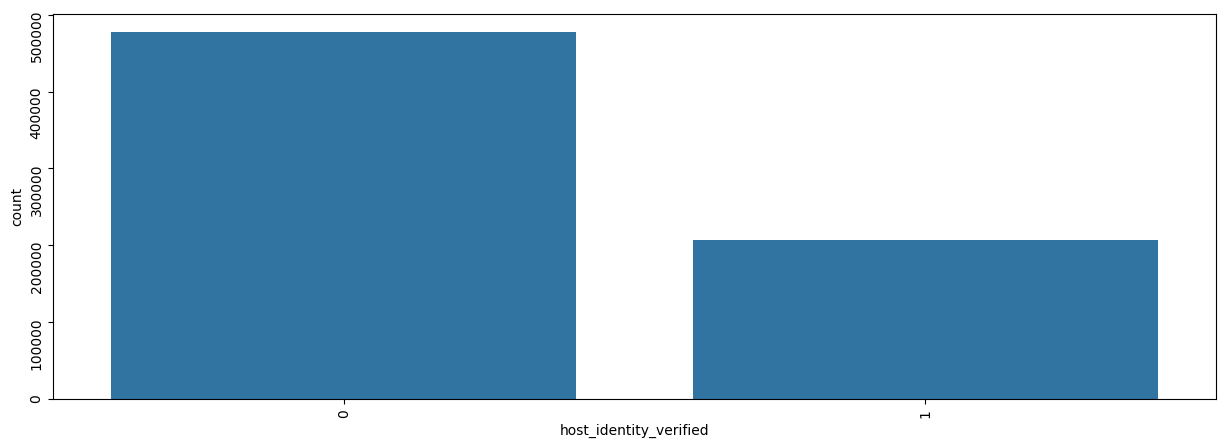

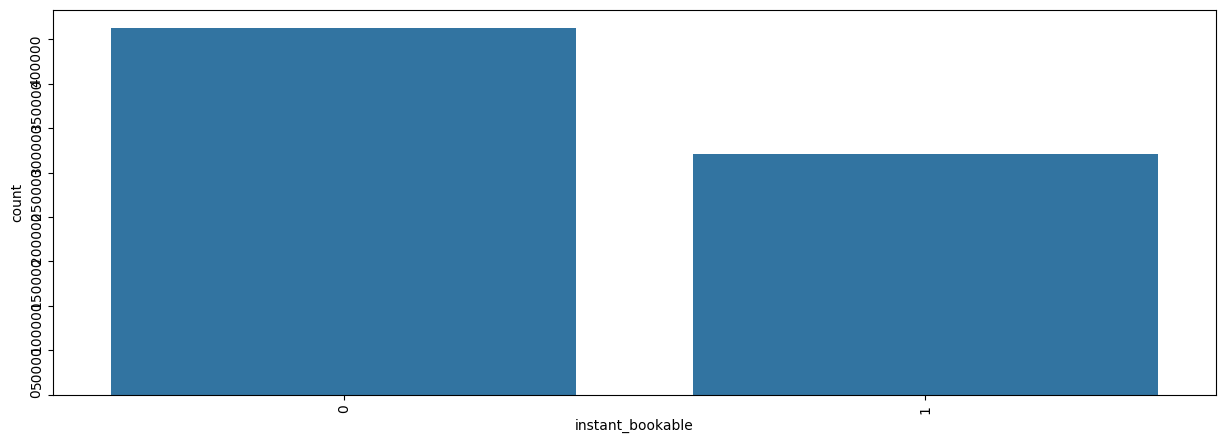

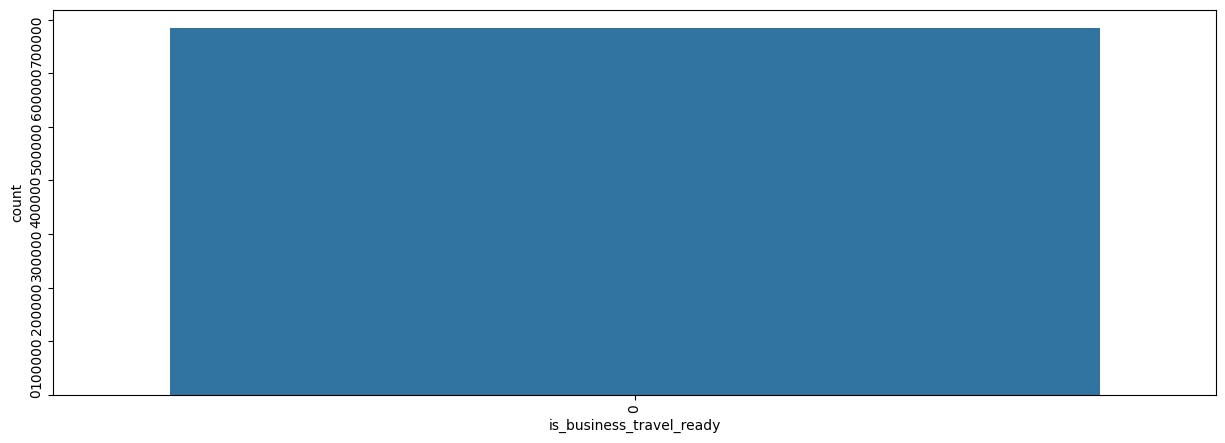

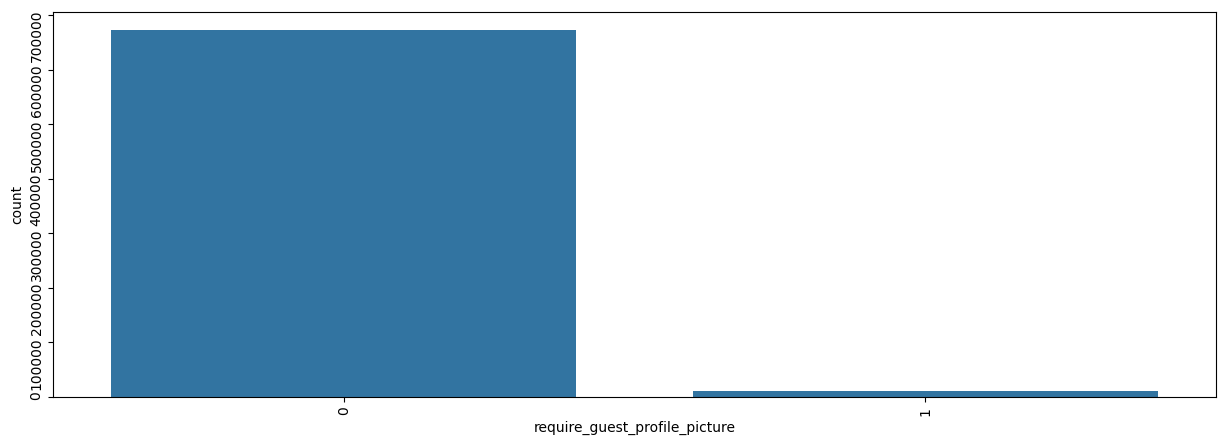

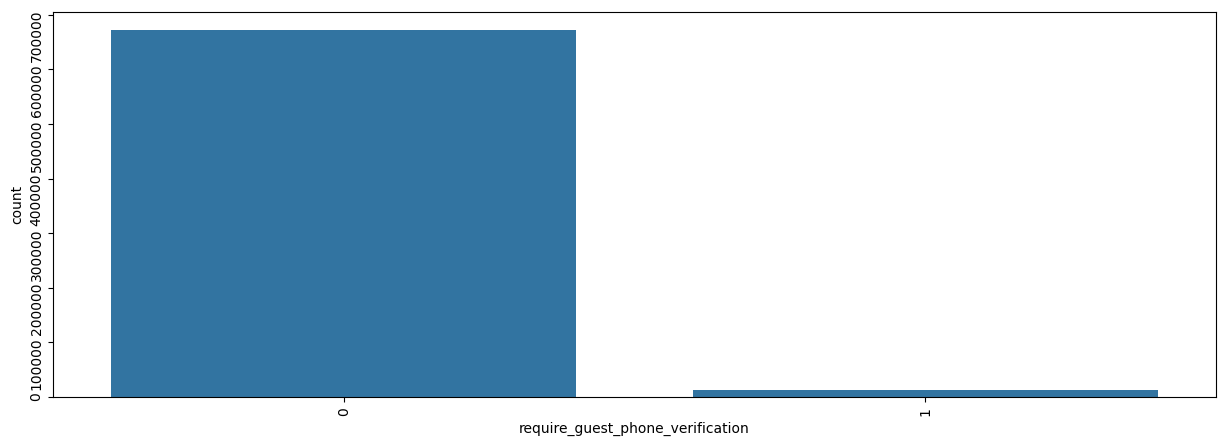

In [65]:
for tf_col in tf_columns:
    text_bar_graph(airbnb_df_encoded[tf_col])

### is_business_travel ready analysis

    -> After encoding it was notable that the is business travel ready had no impact over the model given that all accomodations had the false value atributed. For that reason this column was removed from analysis.

In [66]:
airbnb_df_encoded = airbnb_df_encoded.drop('is_business_travel_ready', axis = 1)
airbnb_df = airbnb_df.drop('is_business_travel_ready', axis = 1)

### Machine Learning Prediction Model
    -> In order to determine which model its better suited for this analysis we will choose the best one given the metrics:
        -> R²: The bigger the better
        -> RMSE (Root Mean Square Error): Tiebreaker criteria. The lower the better
        -> Time and model simplicty will also be considered as factors
    -> Keeping in mind that the model utilizing longitude and latitude on the other file of this project had aproximately:
        -> R² = 97% 
        -> RMSE = 45
        -> Took about 10 minutes to train and test the model.

In [67]:
def evaluate_model(model_name, y_test, prediction):
    r2 = r2_score(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    return f'Model: {model_name}\nR²: {r2}\nRMSE: {rmse}'

### Better fitting our model

In [76]:
airbnb_df_encoded = airbnb_df_encoded.drop(['require_guest_profile_picture', 'require_guest_phone_verification'], axis=1)

### Further discussions about important features
    -> After analysing how this model will be utilized it was noted that some information would be hard for a normal person to fill out in the Streamlit app. Even though those features do have an importance while predicting the price for accomodation they make the app too complex therefore making it useless in normal conditions. For that reason they were removed from the model in order to make it better solution for those who try to use it.

    -> The features removed were: host_total_listings_count, minimum_nights, number_of_reviews, n_amenities.

    -> Keeping up with the functionality of the app, it was also noted that filling in longitude and latitude as information for price prediction as a normal person wouldn't be so effective. As the data provided includes neighbourhood information, it is believed that this information is way more useful to the app in its final form. For that reason this feature is being tested as an alternative for the model and being evaluated if it will result in a better solution with still high accuracy.
    
        -> It was noted that utilizing the neighbourhood instead of latitude and longitude would be very harmful for the machine learning model making it more complex with a way bigger DataFrame, as for the creation of a bunch of dummy variables for eich neighbourhood, with very low accuracy given the parameters set (R² = 68 and RMSE = 153) and taking triple the time necessary to train and test the model.

        -> For that reason longitude and latitude will be kept as the features utilized for location with an approximation for 3 decimal places in the deployed app as it gives a good enough precision to determine the neighbourhood.


In [77]:
airbnb_df_encoded = airbnb_df_encoded.drop(['host_total_listings_count', 'minimum_nights', 'number_of_reviews', 'n_amenities'], axis=1)

### Test model with neighbourhood

In [78]:
et_model = ExtraTreesRegressor()

y = airbnb_df_encoded['price']
X = airbnb_df_encoded.drop('price', axis=1)

# set variables for ml models
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

start_time = time.time()
# train model
et_model.fit(X_train, y_train)
# test model
prediction = et_model.predict(X_test)
elapsed_time = time.time() - start_time
print(evaluate_model('ExtraTrees', y_test, prediction))
print(f'Time spent: {elapsed_time:.02f}')

Model: ExtraTrees
R²: 0.678629552365049
RMSE: 153.48389081997558
Time spent: 1856.83


,0
accommodates,1.317031e-01
room_type_Entire home/apt,1.098061e-01
extra_people,1.052057e-01
bedrooms,9.612256e-02
bathrooms,7.912483e-02
...,...
neighbourhood_cleansed_Turiaçú,5.039167e-07
neighbourhood_cleansed_Jacarezinho,3.655813e-07
neighbourhood_cleansed_Jardim América,2.358055e-07
neighbourhood_cleansed_Zumbi,9.344018e-08


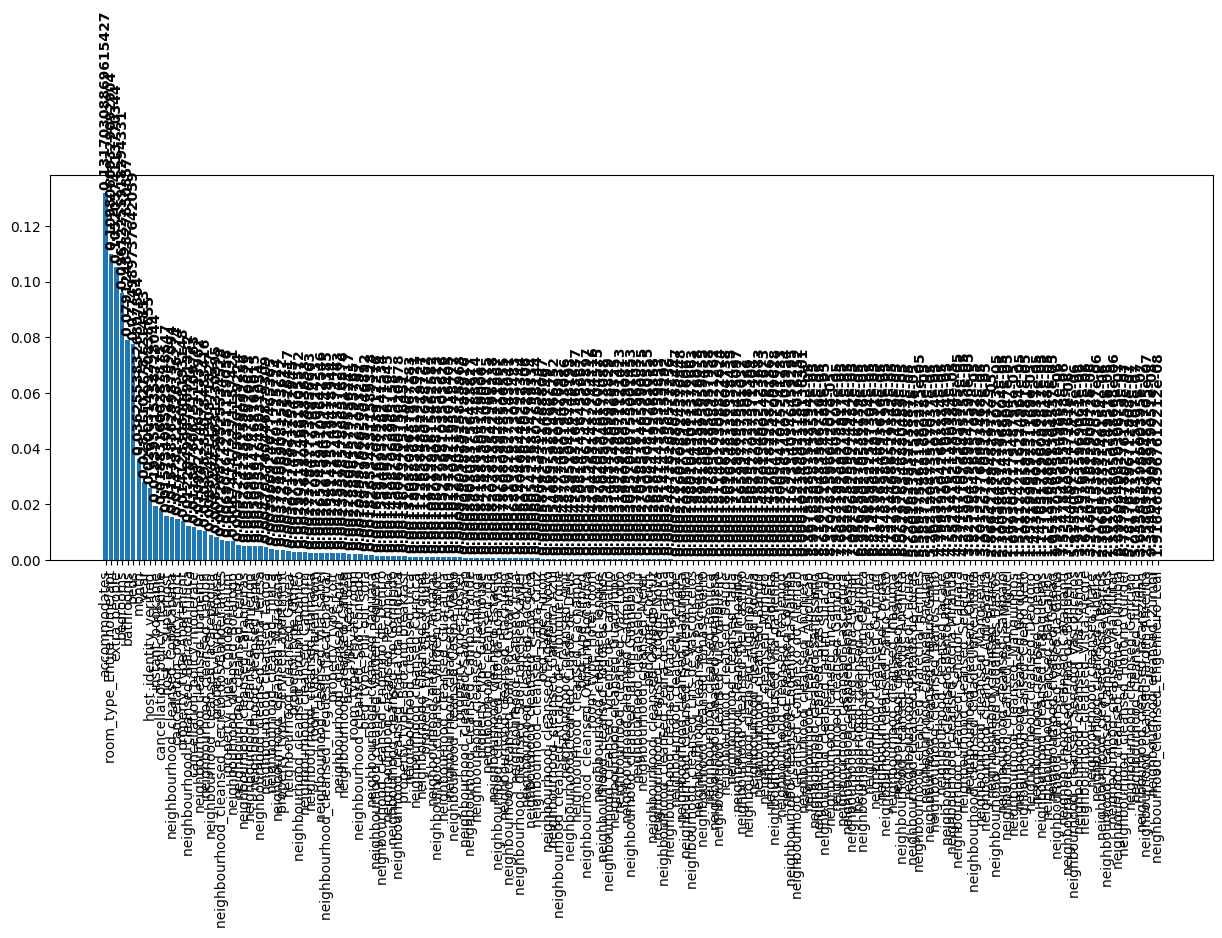

In [79]:
importance_features = pd.DataFrame(et_model.feature_importances_, X_train.columns)
importance_features = importance_features.sort_values(by=0, ascending=False)
display(importance_features)

plt.figure(figsize=(15,5))
bars = plt.bar(importance_features.index, importance_features[0])
plt.bar_label(bars, labels=importance_features[0], padding=3, fontsize=10, fontweight='bold', rotation=90)
plt.xticks(importance_features.index, rotation=90)
plt.show()

In [80]:
print(X.columns)

Index(['host_is_superhost', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'extra_people', 'instant_bookable',
       'year', 'month',
       ...
       'neighbourhood_cleansed_Vidigal',
       'neighbourhood_cleansed_Vigário Geral',
       'neighbourhood_cleansed_Vila Isabel',
       'neighbourhood_cleansed_Vila Kosmos',
       'neighbourhood_cleansed_Vila Militar',
       'neighbourhood_cleansed_Vila Valqueire',
       'neighbourhood_cleansed_Vila da Penha',
       'neighbourhood_cleansed_Vista Alegre', 'neighbourhood_cleansed_Zumbi',
       'neighbourhood_cleansed_Água Santa'],
      dtype='object', length=191)
